In [1]:
from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus']=False


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("health_data.csv")

In [3]:
df

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


### 데이터 전처리

In [4]:
display(df.info()) 
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별           10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

None

기준년도              0
가입자일련번호           0
시도코드              0
성별                0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

In [5]:
df.fillna(method='bfill')['총콜레스테롤'].mean()

197.9544

In [6]:
df['총콜레스테롤'].fillna(197.95, inplace=True)

In [7]:
df.fillna(method='bfill')['트리글리세라이드'].mean()

132.6228

In [8]:
df['트리글리세라이드'].fillna(132.62, inplace=True)

In [9]:
df.fillna(method='bfill')['HDL콜레스테롤'].mean()

56.238119999999995

In [10]:
df['HDL콜레스테롤'].fillna(56.24, inplace=True)

In [11]:
df.fillna(method='bfill')['LDL콜레스테롤'].mean()

115.7697

In [12]:
df['LDL콜레스테롤'].fillna(115.77, inplace=True)

In [13]:
df_1 = df.drop(['기준년도','가입자일련번호','시도코드', 
                '구강검진수검여부', '치아우식증유무', '치석','데이터공개일자'], axis=1)

In [14]:
df1 = df_1.dropna()

In [15]:
display(df1.info()) 
display(df1.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           9858 non-null   object 
 1   연령대코드(5세단위)  9858 non-null   int64  
 2   신장(5Cm단위)    9858 non-null   int64  
 3   체중(5Kg 단위)   9858 non-null   int64  
 4   허리둘레         9858 non-null   float64
 5   시력(좌)        9858 non-null   float64
 6   시력(우)        9858 non-null   float64
 7   청력(좌)        9858 non-null   int64  
 8   청력(우)        9858 non-null   int64  
 9   수축기혈압        9858 non-null   float64
 10  이완기혈압        9858 non-null   float64
 11  식전혈당(공복혈당)   9858 non-null   float64
 12  총콜레스테롤       9858 non-null   float64
 13  트리글리세라이드     9858 non-null   float64
 14  HDL콜레스테롤     9858 non-null   float64
 15  LDL콜레스테롤     9858 non-null   float64
 16  혈색소          9858 non-null   float64
 17  요단백          9858 non-null   float64
 18  혈청크레아티닌      9858 non-null   float64
 19  (혈청지오티

None

성별             0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

In [16]:
df1['성별'].str.get_dummies()

,F,M
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
9994,0,1
9995,1,0
9996,1,0
9997,0,1


In [17]:
df4 = pd.get_dummies(df1, columns=['성별','음주여부','흡연상태'], drop_first=True)

In [18]:
df4

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,성별_M,음주여부_Yes,흡연상태_NotNow,흡연상태_Yes
0,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,...,15.0,1.0,1.1,21.0,27.0,21.0,1,0,0,0
1,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,...,12.7,1.0,0.5,18.0,15.0,15.0,0,0,0,0
2,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,...,12.8,1.0,0.7,27.0,25.0,7.0,0,0,0,0
3,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,...,16.4,1.0,1.2,65.0,97.0,72.0,1,0,0,0
4,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,...,12.4,1.0,0.7,18.0,17.0,14.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,17,150,55,95.0,0.5,0.8,1,1,120.0,66.0,...,15.7,1.0,1.1,22.0,21.0,18.0,1,0,0,0
9995,13,155,55,83.0,1.2,1.2,1,1,120.0,75.0,...,13.7,1.0,0.7,20.0,21.0,20.0,0,1,0,0
9996,11,160,55,77.5,1.0,1.2,1,1,132.0,79.0,...,14.3,1.0,0.7,24.0,22.0,21.0,0,1,0,0
9997,12,160,80,93.0,0.6,0.6,1,1,116.0,75.0,...,15.6,1.0,1.0,22.0,27.0,35.0,1,0,0,0


In [19]:
df4.columns

Index(['연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
       '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
       'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '성별_M', '음주여부_Yes', '흡연상태_NotNow', '흡연상태_Yes'],
      dtype='object')

In [20]:
df4=df4[['성별_M','음주여부_Yes','연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', 
         '시력(우)','청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', 
         '트리글리세라이드','HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
         '(혈청지오티)ALT','감마지티피', '흡연상태_NotNow', '흡연상태_Yes']]

In [21]:
display(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별_M         9858 non-null   uint8  
 1   음주여부_Yes     9858 non-null   uint8  
 2   연령대코드(5세단위)  9858 non-null   int64  
 3   신장(5Cm단위)    9858 non-null   int64  
 4   체중(5Kg 단위)   9858 non-null   int64  
 5   허리둘레         9858 non-null   float64
 6   시력(좌)        9858 non-null   float64
 7   시력(우)        9858 non-null   float64
 8   청력(좌)        9858 non-null   int64  
 9   청력(우)        9858 non-null   int64  
 10  수축기혈압        9858 non-null   float64
 11  이완기혈압        9858 non-null   float64
 12  식전혈당(공복혈당)   9858 non-null   float64
 13  총콜레스테롤       9858 non-null   float64
 14  트리글리세라이드     9858 non-null   float64
 15  HDL콜레스테롤     9858 non-null   float64
 16  LDL콜레스테롤     9858 non-null   float64
 17  혈색소          9858 non-null   float64
 18  요단백          9858 non-null   float64
 19  혈청크레아티

None

### Descision Tree

In [22]:
X = df4.iloc[:, 0:22]  
y = df4.iloc[:, 23] 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.745


In [23]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0) #max_depth 설정으로 과적합 방지
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.812
시험용 데이터 정확도: 0.810


In [24]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.7558448  0.0316573  0.0384686  0.00618912 0.01907884 0.02686846
 0.0127762  0.01573236 0.00247588 0.         0.         0.01047042
 0.02399932 0.00397137 0.         0.01372148 0.01904031 0.00176564
 0.0018723  0.00100446 0.00675873 0.00830444]


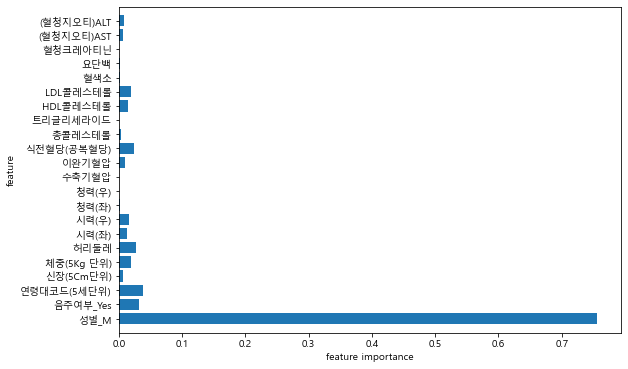

In [29]:
import numpy as np

def plot_feature_importances_df4(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df4.columns[0:22]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df4.columns[0:22])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df4(tree)

In [88]:
!pip install graphviz

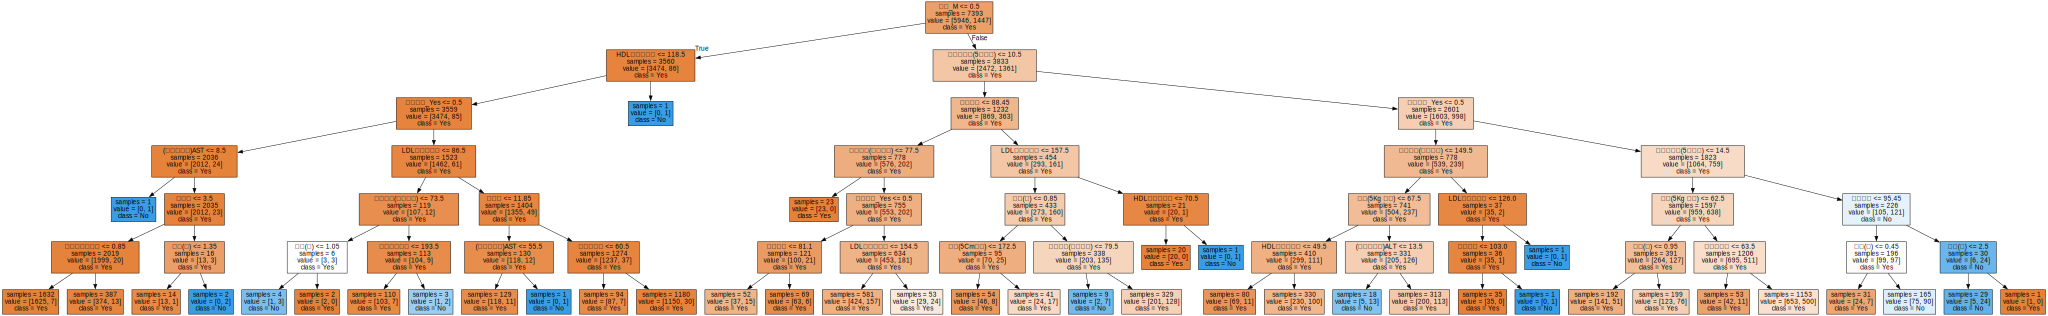

In [25]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Yes", "No"],
                feature_names=df4.columns[0:22], impurity=False, filled=True)

with open("tree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 랜덤포레스트

In [26]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.812


In [39]:
forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=6)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.805
시험용 데이터 세트 정확도: 0.811


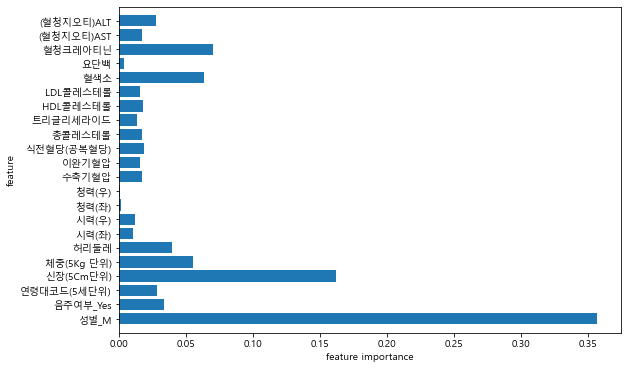

In [40]:
plot_feature_importances_df4(forest)

### 그래디언부스팅

In [55]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=0)

In [56]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.865
시험용 데이터 세트 정확도: 0.809


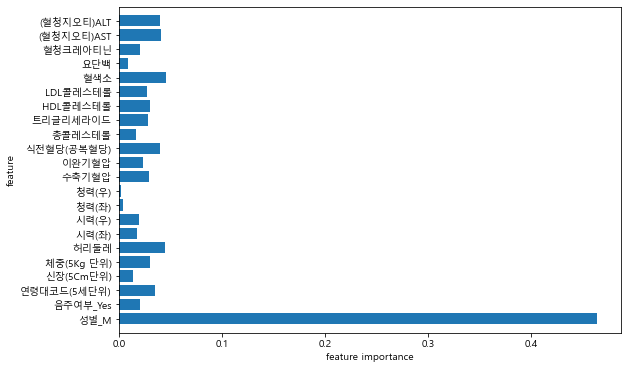

In [57]:
plot_feature_importances_df4(gbrt)

### 성능 평가

In [41]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.79189189 0.79459459 0.78513514 0.7834912  0.78755074 0.80108254
 0.797023   0.797023   0.79296346 0.80108254]
Random forest:  [0.80405405 0.80405405 0.80405405 0.80514208 0.80514208 0.80649526
 0.8037889  0.8037889  0.8037889  0.8037889 ]
Gradient boosting:  [0.8        0.8        0.81351351 0.8037889  0.79566982 0.80784844
 0.80108254 0.80784844 0.80514208 0.79431664]
Accuracy mean
Decision tree :0.793
Random forest :0.804
Gradient boosting :0.803


- 그리드 서치- Decision Tree

In [37]:
#그리드서치
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5,6],'min_samples_leaf':[1,2,3]}

In [38]:
init_dt = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(init_dt, param_grid=parameters, cv=3, refit=True)
print(grid_dt)
# 파라미터들을 순차적으로 학습, 검증
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3]})


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3]})

In [42]:
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 1, 'min_samples_leaf': 1}
GridSearchCV 최고 정확도: 0.8043


- 그리드 서치- Randomforest

In [42]:
parameters = {'max_depth':[1,2,3,4,5,6],'n_estimators':[50,100,150,200]}

In [43]:
init_rf = GradientBoostingClassifier(random_state=0)
grid_rf = GridSearchCV(init_rf, param_grid=parameters, cv=3, refit=True)
print(grid_rf)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]})


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [44]:
print('GridSearchCV 최적 파라미터:', grid_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rf.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 1, 'n_estimators': 150}
GridSearchCV 최고 정확도: 0.8051


- 그리드 서치- GradienBoost

In [59]:
parameters = {'max_depth':[1,2,3,4,5,6], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [60]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)

grid_gbrt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4, 5, 6]})


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [61]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.8044


### 모델 평가

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

0    1998
1     467
Name: 흡연상태_NotNow, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.810
[[1968   30]
 [ 438   29]]
Random forest 시험용 데이터 세트 정확도:0.811
[[1998    0]
 [ 467    0]]
Gradient boosting 시험용 데이터 세트 정확도:0.811
[[1998    0]
 [ 467    0]]


In [63]:
print('정밀도:{:.3f}'.format(precision_score (y_test, dt_pred, average='binary', pos_label=0)))  # pos_label = 1 기본값
print('TP (49) / TP+FP (52) = {:.3f}'.format(49/52))
print('재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary', pos_label=0)))
print('TP (49) / TP+FN (51) = {:.3f}'.format(49/51))
print('f1-measure:{:.3f}'.format(f1_score(y_test, dt_pred, average='binary', pos_label=0)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.942*0.961/(0.942+0.961)))

정밀도:0.818
TP (49) / TP+FP (52) = 0.942
재현율:0.985
TP (49) / TP+FN (51) = 0.961
f1-measure:0.894
2*(정밀도*재현율)/(정밀도+재현율) = 0.951


In [64]:
print('정밀도:{:.3f}'.format(precision_score (y_test, rf_pred, average='binary', pos_label=0)))  # pos_label = 1 기본값
print('TP (49) / TP+FP (52) = {:.3f}'.format(49/52))
print('재현율:{:.3f}'.format(recall_score(y_test, rf_pred, average='binary', pos_label=0)))
print('TP (49) / TP+FN (51) = {:.3f}'.format(49/51))
print('f1-measure:{:.3f}'.format(f1_score(y_test, rf_pred, average='binary', pos_label=0)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.942*0.961/(0.942+0.961)))

정밀도:0.811
TP (49) / TP+FP (52) = 0.942
재현율:1.000
TP (49) / TP+FN (51) = 0.961
f1-measure:0.895
2*(정밀도*재현율)/(정밀도+재현율) = 0.951


In [65]:
print('정밀도:{:.3f}'.format(precision_score (y_test, grid_gbrt_pred, average='binary', pos_label=0)))  # pos_label = 1 기본값
print('TP (49) / TP+FP (52) = {:.3f}'.format(49/52))
print('재현율:{:.3f}'.format(recall_score(y_test, grid_gbrt_pred, average='binary', pos_label=0)))
print('TP (49) / TP+FN (51) = {:.3f}'.format(49/51))
print('f1-measure:{:.3f}'.format(f1_score(y_test, grid_gbrt_pred, average='binary', pos_label=0)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.942*0.961/(0.942+0.961)))

정밀도:0.811
TP (49) / TP+FP (52) = 0.942
재현율:1.000
TP (49) / TP+FN (51) = 0.961
f1-measure:0.895
2*(정밀도*재현율)/(정밀도+재현율) = 0.951


In [52]:
from sklearn.metrics import classification_report

# 각 클래스가 Positive일 때의 정밀도, 재현율, f1 값을 보여줌 ("0"이 Postivit인 경우가 기본값임)
# macro avg는 클래스별 점수의 평균을 계산
# weighted avg는 클래스의 샘플 수로 가중평균을 계산
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=['0','1']))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=['0','1']))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=['0','1']))

Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1998
           1       0.49      0.06      0.11       467

    accuracy                           0.81      2465
   macro avg       0.65      0.52      0.50      2465
weighted avg       0.76      0.81      0.75      2465

Random Forest:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1998
           1       0.00      0.00      0.00       467

    accuracy                           0.81      2465
   macro avg       0.41      0.50      0.45      2465
weighted avg       0.66      0.81      0.73      2465

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1998
           1       0.00      0.00      0.00       467

    accuracy                           0.81      2465
   macro avg       0.41      0.50      0.45      2465
weighted avg       0.66  

c:\users\양세정\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\양세정\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\양세정\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### 결론

- Decision tree, Random forest, Gradient boosting 3개의 모델의 큰 차이가 없었지만,  
그 중 정확도는 두번째로 큰 모델이면서 과적합을 보이지 않고 정밀도, 재현율 등이 안정적인 의사결정나무를 선택했음.  

- 흡연여부를  결정하는 중요 변수는 성별_M(남성)이 압도적으로 비중이 컸고 이 외에 3가지 모델에서 유의미했던 변수들은  
콜레스테롤(LDL, HDL), 식전혈당(공복혈당), 혈청지오티, 혈청크레아티닌, 혈색소가 있다(체중, 신장 변수 또한 유의미하게 나온  
이유는 아마 성별_M변수가 차지하는 비중이 크기때문인 것 같다).
- 즉, 흡연을 하는 사람은 주로 남성이고 흡연을 함으로써 콜레스테롤, 식전혈당, 혈청지오티, 혈청크레아티닌, 혈색소에 영향을  
준다라는 것을 알 수 있다.
- 위 변수들을 보았을 때, 흡연자는 혈관, 신장, 그리고 간에 영향을 받을 수 있으므로 주의 및 관리가 필요할 것이다.